# Importing the Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exalab/Emotion.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Exalab/EmotionTest.csv')

In [3]:
train_data.head()

,text,label
0,قبلا میگفتن اگه درس نخونی معلم میزندت، الان در...,0. 0. 0. 0. 0. 0. 0. 0. 0. 1.\n
1,یه شات هست از کلاب‌هاوس که هی توییت و لایک و ک...,0. 0. 0. 0. 0. 0. 0. 0. 0. 1.\n
2,ایران انقده خوبه که اصن همه میدونن منو بفرستین...,1. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n
3,رد پای من هر جا بری هس.,0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n
4,#علی_جوانمردیآقای #علی‌جوانمردی؛در این‌که شما ...,0. 1. 0. 0. 1. 0. 0. 0. 0. 0.\n


In [4]:
print(train_data.shape)
print(test_data.shape)

(5999, 2)
(1000, 2)


# Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


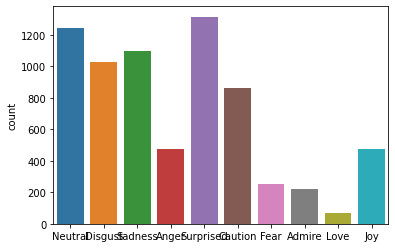

In [5]:
import seaborn as sns

emotion_list=[]
for emotion in train_data['label']:
  if emotion[0]=='1':
    emotion_list.append("Disgust")
  if emotion[3]=='1':
    emotion_list.append("Anger")
  if emotion[6]=='1':
    emotion_list.append("Fear")
  if emotion[9]=='1':
    emotion_list.append("Sadness")
  if emotion[12]=='1':
    emotion_list.append("Surprised")
  if emotion[15]=='1':
    emotion_list.append("Admire")
  if emotion[18]=='1':
    emotion_list.append("Caution")
  if emotion[21]=='1':
    emotion_list.append("Love")
  if emotion[24]=='1':
    emotion_list.append("Joy")
  if emotion[27]=='1':
    emotion_list.append("Neutral")

sns.countplot(emotion_list)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


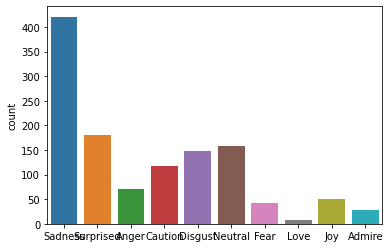

In [6]:
import seaborn as sns

emotion_list=[]
for emotion in test_data['label']:
  if emotion[0]=='1':
    emotion_list.append("Disgust")
  if emotion[3]=='1':
    emotion_list.append("Anger")
  if emotion[6]=='1':
    emotion_list.append("Fear")
  if emotion[9]=='1':
    emotion_list.append("Sadness")
  if emotion[12]=='1':
    emotion_list.append("Surprised")
  if emotion[15]=='1':
    emotion_list.append("Admire")
  if emotion[18]=='1':
    emotion_list.append("Caution")
  if emotion[21]=='1':
    emotion_list.append("Love")
  if emotion[24]=='1':
    emotion_list.append("Joy")
  if emotion[27]=='1':
    emotion_list.append("Neutral")

sns.countplot(emotion_list)

# Preprocessing

In [7]:
# Drop empty rows
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

In [8]:
# Drop duplicates
train_data.drop_duplicates(subset =['text'], inplace = True)
test_data.drop_duplicates(subset =['text'], inplace = True)

In [9]:
print(train_data.shape)
print(test_data.shape)

(5990, 2)
(1000, 2)


In [10]:
# Fixing the format of lables
y_train =[]
for lable in train_data['label']:
  tmp=[]
  for i in range(0,10):
    if lable[3*i] == '1':
      tmp.append(1)
    else:
      tmp.append(0)
  y_train.append(tmp)

y_test =[]
for lable in test_data['label']:
  tmp=[]
  for i in range(0,10):
    if lable[3*i] == '1':
      tmp.append(1)
    else:
      tmp.append(0)
  y_test.append(tmp)

y_train[0]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [11]:
import numpy as np
y_train=np.array(y_train)
y_test = np.array(y_test)

In [12]:
pip install --upgrade arabic-reshaper

In [13]:
pip install hazm

In [14]:
from hazm import word_tokenize, stopwords_list, InformalLemmatizer
import re
import arabic_reshaper

from tqdm import tqdm as progressbar

In [15]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r' ', text)

In [16]:
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r' ', text)

In [17]:
def remove_extra_repeated_alpha(text):
    return re.sub(r'([^\W\d_])\1{2,}', r'\1', text)

In [18]:
def remove_hashtag(text):
    return re.sub(r'#([^\s]+)', r'\1', text)

In [19]:
# Except ?,!
def remove_punctuations(text):
    punctuations = re.compile(r'[~`@#$%^&*(,<،>){}\\/|\'"-=~\[\]]')
    return punctuations.sub(r' ', text)

In [20]:
lemma = InformalLemmatizer()

def clean_up(text, url=True, html=True, punctuations=True, lemmatize=True, hashtag=True, stopwords=True, remove_extra_alpha=True):
    # remove url
    if url:
        text = remove_urls(text)
    # remove html tags
    if html:
        text = remove_html(text)
    # remove punctuations
    if punctuations:
        text = remove_punctuations(text)
    # Alter words with repeated alphabets
    if remove_extra_repeated_alpha:
        text = remove_extra_repeated_alpha(text)
    # tokenize text
    tokens = word_tokenize(text)
    # remove stop words
    if stopwords:
        tokens = [word for word in tokens if word not in stopwords_list()]
    # lemmatize words
    if lemmatize:
        tokens = [lemma.lemmatize(word) for word in tokens]
    text = ' '.join(tokens)
    # remove hashtag
    if hashtag:
      text = remove_hashtag(text)
    
    return text

In [21]:
df = train_data
for index, row in progressbar(df.iterrows(), total=df.shape[0]):
    row = row.copy()
    text = clean_up(row.text)
    df.loc[index, 'text'] = text

100%|██████████| 5990/5990 [01:46<00:00, 56.24it/s]


In [22]:
df_test = test_data
for index, row in progressbar(df_test.iterrows(), total=df_test.shape[0]):
    row = row.copy()
    text = clean_up(row.text)
    df_test.loc[index, 'text'] = text

100%|██████████| 1000/1000 [00:15<00:00, 66.25it/s]


In [23]:
df.head()

,text,label
0,قبلا میگفتن اگه درس خواندخوان معلم میزندت الان...,0. 0. 0. 0. 0. 0. 0. 0. 0. 1.\n
1,یه شات هست کلاب‌هاوس هی تو لایک کو شدشو هربار ...,0. 0. 0. 0. 0. 0. 0. 0. 0. 1.\n
2,ایران انقده خوبه اصن میدونن منو فرستادفرست خارج,1. 0. 0. 0. 0. 0. 0. 0. 0. 0.\n
3,رد پای بری هس,0. 0. 0. 1. 0. 0. 0. 0. 0. 0.\n
4,علی_جوانمردیآقای علی‌جوانمردی ؛ این‌که شخصیت ت...,0. 1. 0. 0. 1. 0. 0. 0. 0. 0.\n


# Experiment 1.1: Chi2 + NB

In [24]:
# Chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vect = CountVectorizer()
train_vec = vect.fit_transform(df['text']).toarray()
test_vec = vect.transform(df_test['text']).toarray()

chi2_features = SelectKBest(chi2, k=10000)
X_train = chi2_features.fit_transform(train_vec, df['label'])
X_test = chi2_features.transform(test_vec)

In [25]:
# Training MultinomialNB and evaluating the performance
from sklearn.naive_bayes import MultinomialNB
import numpy as np
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(X_train,df['label'])
myPredTest=NBClassifier.predict(X_test)
print('Best Acc Naive Bayes')
print(np.sum(myPredTest==df_test['label'])/len(df_test['label'])*100)

Best Acc Naive Bayes
25.8


# Experiment 1.2: Chi2 + NB + Duplication

In [26]:
ddf = []
d_y=[]
i=0
for txt in df['text']:
  none =True
  tmp =[]
  counter=0
  for j in y_train[i]:
    if j==1:
      tedade_sefr = counter
      for k in range(0,tedade_sefr):
        tmp.append(0)
      tmp.append(1)
      tedade_sefr= 10 -tedade_sefr-1
      for k in range(0,tedade_sefr):
        tmp.append(0)
      d_y.append(tmp)
      ddf.append(txt)
      tmp=[]
      none=False
    counter=counter+1
  if none:
    d_y.append([0,0,0,0,0,0,0,0,0,0])
    ddf.append(txt)
  i=i+1

In [27]:
ddf_test = []
d_y_test=[]
i=0
for txt in df_test['text']:
  none =True
  tmp =[]
  counter=0
  for j in y_test[i]:
    if j==1:
      tedade_sefr = counter
      for k in range(0,tedade_sefr):
        tmp.append(0)
      tmp.append(1)
      tedade_sefr= 10 -tedade_sefr-1
      for k in range(0,tedade_sefr):
        tmp.append(0)
      d_y_test.append(tmp)
      ddf_test.append(txt)
      tmp=[]
      none=False
    counter=counter+1
  if none:
    d_y_test.append([0,0,0,0,0,0,0,0,0,0])
    ddf_test.append(txt)
  i=i+1

In [28]:
d_y=np.array(d_y)
d_y_test = np.array(d_y_test)

In [29]:
nb_d_y = []
for l in d_y:
  tmp=''
  for c in l:
    tmp = tmp + str(c)
  nb_d_y.append(tmp)

In [30]:
nb_d_y_test = []
for l in d_y_test:
  tmp=''
  for c in l:
    tmp = tmp + str(c)
  nb_d_y_test.append(tmp)

In [31]:
# Chi2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2

vect = CountVectorizer()
train_vec = vect.fit_transform(ddf).toarray()
test_vec = vect.transform(ddf_test).toarray()

chi2_features = SelectKBest(chi2, k=10000)
X_train = chi2_features.fit_transform(train_vec, nb_d_y)
X_test = chi2_features.transform(test_vec)

In [32]:
# Training MultinomialNB and evaluating the performance
from sklearn.naive_bayes import MultinomialNB
import numpy as np
curAlpha=0.33 #smoothing factor in NB
NBClassifier=MultinomialNB(alpha=curAlpha)
NBClassifier.fit(X_train,nb_d_y)
myPredTest=NBClassifier.predict(X_test)
print('Best Acc Naive Bayes')
print(np.sum(myPredTest==nb_d_y_test)/len(nb_d_y_test)*100)

Best Acc Naive Bayes
34.82871125611746


# Experiment 2: CNN + Duplication

In [33]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence

In [34]:
text = []
for ses_mod in ddf:
    text.append(ses_mod)
MAX_SEQUENCE_LENGTH = 269

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)

token_tr_X = tokenizer.texts_to_sequences(text)
x_train = []

x_train = sequence.pad_sequences(token_tr_X, maxlen=MAX_SEQUENCE_LENGTH)
x_train

array([[    0,     0,     0, ...,    24,    12,   187],
       [    0,     0,     0, ...,   301,    22,   897],
       [    0,     0,     0, ...,   159,   529,   232],
       ...,
       [    0,     0,     0, ..., 19104,    93,   660],
       [    0,     0,     0, ...,   467,    59,  8985],
       [    0,     0,     0, ...,  3367,  2295,  2059]], dtype=int32)

In [35]:
text = []
for ses_mod in ddf_test:
    text.append(ses_mod)

token_tr_X = tokenizer.texts_to_sequences(text)
x_test = []

x_test = sequence.pad_sequences(token_tr_X, maxlen=MAX_SEQUENCE_LENGTH)

In [36]:
print(x_train.shape)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

(7035, 269)
Found 19113 unique tokens


In [37]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.preprocessing import sequence
from keras.layers.embeddings import Embedding
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, average_precision_score
from keras.callbacks import ModelCheckpoint

In [38]:
label_num = 10
model_c = Sequential()
model_c.add(Embedding(input_dim=19114, output_dim=300, input_length=269))
model_c.add(Conv1D(activation="relu", padding="valid", filters=300, kernel_size=7))
model_c.add(GlobalMaxPooling1D())
model_c.add(Dense(600, activation='relu'))
model_c.add(Dense(label_num, activation='softmax'))
model_c.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [39]:
model_c.fit(x_train, d_y, batch_size=32, epochs=30)

Epoch 1/30
220/220 [==============================] - 173s 783ms/step - loss: 2.0021 - accuracy: 0.2579
Epoch 2/30
220/220 [==============================] - 180s 819ms/step - loss: 1.4594 - accuracy: 0.4800
Epoch 3/30
220/220 [==============================] - 168s 763ms/step - loss: 0.8416 - accuracy: 0.6988
Epoch 4/30
220/220 [==============================] - 171s 775ms/step - loss: 0.5428 - accuracy: 0.7768
Epoch 5/30
220/220 [==============================] - 170s 772ms/step - loss: 0.3935 - accuracy: 0.8055
Epoch 6/30
220/220 [==============================] - 169s 766ms/step - loss: 0.3174 - accuracy: 0.8136
Epoch 7/30
220/220 [==============================] - 169s 767ms/step - loss: 0.2800 - accuracy: 0.8242
Epoch 8/30
220/220 [==============================] - 168s 762ms/step - loss: 0.2546 - accuracy: 0.8316
Epoch 9/30
220/220 [==============================] - 164s 745ms/step - loss: 0.2444 - accuracy: 0.8378
Epoch 10/30
220/220 [==============================] - 161s 732m

In [40]:
scores = model_c.evaluate(x_test, d_y_test)
print("\n%s: %.2f%%" % (model_c.metrics_names[1], scores[1]*100))

39/39 [==============================] - 7s 183ms/step - loss: 4.0842 - accuracy: 0.2879

accuracy: 28.79%


In [45]:
from sklearn.metrics import classification_report

# Predicting the Results
y_pred = model_c.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)
y_final=y_pred_bool.round
print(classification_report(d_y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.24      0.26      0.25       148
           1       0.30      0.29      0.29        70
           2       0.22      0.14      0.17        42
           3       0.51      0.10      0.16       421
           4       0.32      0.41      0.36       181
           5       0.19      0.10      0.13        29
           6       0.26      0.50      0.34       117
           7       0.40      0.25      0.31         8
           8       0.00      0.00      0.00        51
           9       0.35      0.28      0.31       159

   micro avg       0.30      0.23      0.26      1226
   macro avg       0.28      0.23      0.23      1226
weighted avg       0.35      0.23      0.24      1226
 samples avg       0.23      0.23      0.23      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Experiment 3: LSTM + Duplication

In [ ]:
#pip install tensorflow

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

# Defining Model Architecture
model = Sequential()

model.add(Embedding(19114,128, input_length = MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.4))

model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 269, 128)          2446592   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 269, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 2,579,466
Trainable params: 2,579,466
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.fit(x_train, d_y,batch_size=128, epochs=50, verbose=1)

Epoch 1/50
55/55 [==============================] - 87s 2s/step - loss: 2.1115 - accuracy: 0.2023
Epoch 2/50
55/55 [==============================] - 84s 2s/step - loss: 1.9841 - accuracy: 0.2789
Epoch 3/50
55/55 [==============================] - 84s 2s/step - loss: 1.6803 - accuracy: 0.4165
Epoch 4/50
55/55 [==============================] - 86s 2s/step - loss: 1.2900 - accuracy: 0.5461
Epoch 5/50
55/55 [==============================] - 86s 2s/step - loss: 0.9955 - accuracy: 0.6443
Epoch 6/50
55/55 [==============================] - 85s 2s/step - loss: 0.8011 - accuracy: 0.7041
Epoch 7/50
55/55 [==============================] - 84s 2s/step - loss: 0.6672 - accuracy: 0.7502
Epoch 8/50
55/55 [==============================] - 84s 2s/step - loss: 0.5781 - accuracy: 0.7731
Epoch 9/50
55/55 [==============================] - 84s 2s/step - loss: 0.5116 - accuracy: 0.7862
Epoch 10/50
55/55 [==============================] - 83s 2s/step - loss: 0.4750 - accuracy: 0.8017
Epoch 11/50
55/55 [

In [ ]:
accr = model.evaluate(x_test,d_y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

39/39 [==============================] - 3s 77ms/step - loss: 3.6845 - accuracy: 0.3002
Test set
  Loss: 3.684
  Accuracy: 0.300


In [ ]:
from sklearn.metrics import classification_report

# Predicting the Results
y_pred = model.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)
y_final=y_pred_bool.round
print(classification_report(d_y_test, y_final.round()))

              precision    recall  f1-score   support

           0       0.22      0.32      0.26       148
           1       0.26      0.26      0.26        70
           2       0.33      0.12      0.18        42
           3       0.48      0.19      0.28       421
           4       0.33      0.46      0.39       181
           5       0.05      0.03      0.04        29
           6       0.30      0.29      0.29       117
           7       0.17      0.12      0.14         8
           8       0.15      0.10      0.12        51
           9       0.29      0.36      0.32       159

   micro avg       0.31      0.27      0.29      1226
   macro avg       0.26      0.23      0.23      1226
weighted avg       0.34      0.27      0.28      1226
 samples avg       0.27      0.27      0.27      1226



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preparing the predictions

In [47]:
bi_y = []
for l in d_y_test:
  tmp=''
  for c in l:
    tmp = tmp + str(c)
  bi_y.append(tmp)

In [48]:
integer_sum = int(bi_y[0], 2) + int(bi_y[1], 2)
binary_sum = bin(integer_sum)

In [49]:
results=pd.DataFrame({"text":ddf_test,"Predictions":bi_y})
results

,text,Predictions
0,عشق واقعی تظاهر عاشق فرق میکنه عشق نا امید شدشو,0001000000
1,عشق واقعی تظاهر عاشق فرق میکنه عشق نا امید شدشو,0000100000
2,درود شرافت بازیگر کسانیکه احترام میهنانشان افط...,0000100000
3,تناقض اینه لباس گرینگو مراتب شیک تر بازیکنای ت...,0000100000
4,واسه دوست دارم‌باهم‌حرف زدزن یه کاشتکار خوشحال...,0100000000
...,...,...
1221,کشور وحش عقب مانده شعار مرگ کشور های سر میهن ک...,0000000001
1222,حق اون دوست عزیز 🌷🌷,0000100000
1223,قیمت دستته آفرین معلومه سر کلاه گذاشتن,0001000000
1224,شب استرسی واقعا,0000000100


In [50]:
pred = []
y_pred = []
dup=False
for i in range(0,len(results['text'])-1):
  if dup:
    dup=False
  else:
    if results['text'][i] != results['text'][i+1]:
      pred.append(results['text'][i])
      y_pred.append(results['Predictions'][i])
    else:
      pred.append(results['text'][i])
      integer_sum = int(results['Predictions'][i], 2) + int(results['Predictions'][i+1], 2)
      binary_sum = bin(integer_sum)
      y_pred.append(binary_sum)
      dup = True
pred.append(results['text'][1225])
y_pred.append(results['Predictions'][1225])

In [51]:
pred

['عشق واقعی تظاهر عاشق فرق میکنه عشق نا امید شدشو',
 'درود شرافت بازیگر کسانیکه احترام میهنانشان افطار پارتی ریاست جمهوری مطرود ما_به_افطاری_نخواهیم_رفت',
 'تناقض اینه لباس گرینگو مراتب شیک تر بازیکنای تیم ملیه',
 'واسه دوست دارم\u200cباهم\u200cحرف زدزن یه کاشتکار خوشحال شدشو',
 'تلخ کردکن دهان قند دهینم دادده ب کشت آب دهیجان منی یار دولت پایدار باغ منو بهار منباغ مرا خزان دهی💔',
 'منظور دیگه ای',
 'چشم آمدآ منو یاری بکنگونه\u200cهام خشکیدخشک کاشتکار بکنغیر گریه مگه کاشتکار میشه کردکاری نمیاد زاری بکناون رفته دیگه وقت نمیادتا قیامت دل گریه میخواد',
 'خب داستان دیگه \U0001f9cd🏻',
 'آماده ایم عکس آواتارمون مناسبت روز فرخنده دادده نه_به_جمهوري_اسلامي',
 'من خوب عزیز پیام میادم خدا لعنت کنه ممد',
 'یه دانستدان ای عشقم😍😍😍این داستان خودم نمیباشد 🤦\u200d♂️🤦\u200d♂️🤦\u200d♂️لوکیشن فرستادفرست بانو😂😂😂',
 '😂😂😂 چقدر باهاشون خاطره داشتدار',
 'انقدر ساکته سططسطسدارم میترسم',
 'من نمیدونم گوش نمیذارم کنارهر دیگه خاموشیه',
 'مسئله دیورند استت اینگونه اظهارات عده پشتون احساساتی نادان مصرف ؛ میدانند گاو

In [52]:
y_pred

['0b1100000',
 '0000100000',
 '0000100000',
 '0b101000000',
 '0001000000',
 '0001000000',
 '0000001000',
 '0001000000',
 '1000000000',
 '0000000001',
 '0b11000000',
 '0100000000',
 '0000000100',
 '0001000000',
 '0000000001',
 '0000100000',
 '0001000000',
 '0000001000',
 '0000000001',
 '1000000000',
 '0001000000',
 '0000001000',
 '0001000000',
 '0001000000',
 '0100000000',
 '0001000000',
 '0b11',
 '0001000000',
 '0001000000',
 '1000000000',
 '0010000000',
 '1000000000',
 '0001000000',
 '0b100100000',
 '1000000000',
 '0b1000001',
 '0001000000',
 '0010000000',
 '0000100000',
 '0000001000',
 '0000001000',
 '0b10100',
 '0b1100000',
 '0000000001',
 '0001000000',
 '0001000000',
 '0000001000',
 '0000100000',
 '0000000100',
 '0001000000',
 '0b11',
 '0b1000001',
 '1000000000',
 '0000100000',
 '0001000000',
 '0001000000',
 '0001000000',
 '1000000000',
 '0000000001',
 '0001000000',
 '1000000000',
 '0b101000',
 '0b11000000',
 '1000000000',
 '0b1000001',
 '1000000000',
 '0001000000',
 '0001000000',
